In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms.linear_transform import LinearMatrix
from nopt.transforms.fastjlt import FastJLT
from nopt.constraints.sparse import *
from nopt.constraints.rank import *
from nopt.constraints.sparse_oblique import *
from nopt.constraints.oblique import *
from nopt.problems.linear_problem import *
from nopt.problems.linear_problem_sum import *
from nopt.problems.sparse_principal_subspace import *
from nopt.solvers.niht import *
from nopt.solvers.naht import *
from nopt.solvers.oblique_spca import *
from nopt.tests.generate_lsmat1 import *
from nopt.tests.generate_qsmat1 import *

In [9]:
m = 500
n = 500
r = 10
c = 2
alpha = 0.15
s = round(c*np.sqrt(n)*r) #round(alpha*n*r)
N = 400; # number of samples

#s = round(rho_s*n*r)
alpha = s/(n*r)
print(s)
print(alpha)
#r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))

447
0.0894


In [10]:
subspace0, q0 = GenerateQSMat1((n,r), s)

theta = 5; # Signal strength
samples = np.random.multivariate_normal(np.zeros((n,)), np.eye(n) + theta* q0@q0.T, N).T
#covariance matrix = samples @ samples.T / N
A = LinearMatrix(samples.T / np.sqrt(N))
A = LinearMatrix(samples @ samples.T / N)

1.673361734564404
0.020954188237097368


In [24]:
lam = 10*n/r
print(lam)
problem = SparsePrincipalSubspace(A, rank = r, sparsity=s)
problem.objective(q0)

500.0


581.9028341876168

In [25]:
HTr = Rank(r)
subspaces,_ = HTr.project(A._matrix)
HTso = SparseOblique(s)
_, x0 = HTso.project_quasi(subspaces[1])

In [26]:
solver = ObliqueSPCA(logverbosity = 2, maxiter = 10000)
subspace, x, opt_log = solver.solve(problem=problem, lam=lam, x=x0)

 iter		   obj. value	    grad. norm
    1	+6.4385166392103417e+02	1.50785419e+02
    2	+6.4355049214148869e+02	9.59713448e+01
    3	+6.3692025568868587e+02	1.16904811e+02
    4	+6.3559170319615566e+02	8.58928841e+01
    5	+6.3450164029680388e+02	8.46511675e+01
    6	+6.3341493896179929e+02	8.04178395e+01
    7	+6.3262270712351517e+02	7.83798463e+01
    8	+6.3187340084405218e+02	7.65387821e+01
    9	+6.3132963139670801e+02	7.59703063e+01
   10	+6.3079219792388494e+02	7.76162583e+01
   11	+6.3074519190984597e+02	7.86665811e+01
   12	+6.2905417964476749e+02	8.23551291e+01
   13	+6.2418971214940655e+02	6.68288928e+01
   14	+6.1132657971322317e+02	1.21606284e+02
   15	+6.0879793404273175e+02	9.11937377e+01
   16	+6.0776344900494860e+02	8.51935717e+01
   17	+6.0698719854152921e+02	8.34051940e+01
   18	+6.0643391538268941e+02	8.01055301e+01
   19	+6.0597028931532873e+02	8.04686052e+01
   20	+6.0562140611165478e+02	7.77297983e+01
   21	+6.0531313859125714e+02	7.86572976e+01
   22	+6.0508182441

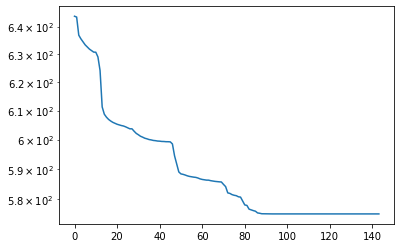

In [27]:
plt.semilogy(opt_log['iterations']['fx'])

naive:        0.8018954487197569
oblique:      0.820414053144523
groundtruth:  0.8180410900312547
0.019905978670961


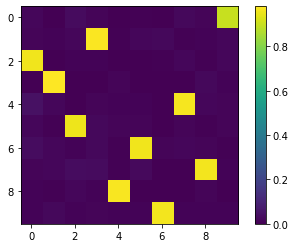

In [28]:
print('naive:       ', 1 - problem.objective(x0) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('oblique:     ', 1 - problem.objective(x) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('groundtruth: ', 1 - problem.objective(q0) / (2*np.linalg.norm(A._matrix,'fro')**2))
if r == 1:
    print(np.linalg.norm( (q0.T @ x) * x - q0))
else:
    plt.imshow(np.abs(q0.T @ x))
    plt.colorbar()
    print(1-np.max(np.abs(q0.T @ x)))

In [29]:
from sklearn.decomposition import SparsePCA
transformer = SparsePCA(n_components=r, random_state=0, alpha = 0.5)
transformer.fit(A._matrix)
x_scikit = transformer.components_.T

scikit:       0.8151658936842473


400

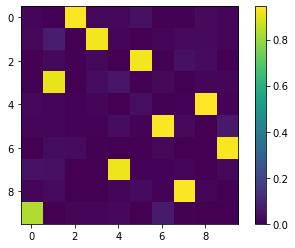

In [30]:
print('scikit:      ', 1 - problem.objective(x_scikit) / (2*np.linalg.norm(A._matrix,'fro')**2))
plt.imshow(np.abs(x_scikit.T @ q0))
plt.colorbar()
np.count_nonzero(x_scikit)

In [34]:
s

168